In [71]:
import numpy as np
from scipy import stats
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

記述統計：実際に観察している統計データの分析

推測統計：標本データから母集団の特性を推論

In [2]:
apple_weights = [295, 300, 300, 310, 311]
#算術平均
apple_w_mean = np.mean(apple_weights)
#算術平均からの差の合計は常に０になる
deviations = apple_weights - apple_w_mean
print(deviations.sum())

5.684341886080802e-14


平均からの差を偏差(deviation)という

算術平均は、各値からの差の二乗の合計（平方和）を最小にする値

In [3]:
salary_growth = [1.05, 1.1, 1.3]
#幾何平均(データの値が比率の場合)
salary_growth_mean = stats.gmean(salary_growth)
print(salary_growth_mean)

1.1450956868476592


In [4]:
velocities = [20, 60]
#調和平均
velocities_mean = stats.hmean(velocities)
print(velocities_mean)

30.0


In [9]:
#中央値:medianは外れ値の影響を受けにくい
#標準正規分布からランダム値で抽出
randoms = np.random.randn(10**7)
#計算前の時間(sec)
before_mean = time.time()
#平均を計算
mean = np.mean(randoms)
#平均計算後の時間
after_mean = time.time()
print("mean is {} (time:{: .2f}s)".format(mean, after_mean-before_mean))

#計算前の時間(sec)
before_median = time.time()
#平均を計算
median = np.median(randoms)
#平均計算後の時間
after_median = time.time()
print("median is {} (time:{: .2f}s)".format(median, after_median-before_median))


mean is 3.315335660760237e-05 (time: 0.00s)
median is -8.634907104332238e-05 (time: 0.13s)


In [10]:
#最頻値とその個数
mode, count = stats.mode([6,2,4,5,1,3,5,3,4])
#2つの最頻値があれば、小さい方を返す
print(mode)
print(count)

[3]
[2]


In [13]:
array = np.array([[1, 5, 3, 2],
                  [4, 1, 3, 4],
                  [7, 2, 1, 5],
                  [5, 2, 4, 1]])
mode, count = stats.mode(array, axis=0)
print(mode)
print(count)

[[1 2 3 1]]
[[1 2 2 1]]


IQR: 46.0
QD: 23.0


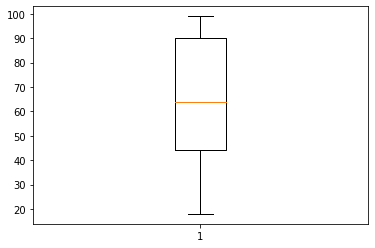

In [19]:
#四部位数：データをソートした時に4等分する位置にある値
#四部位範囲(IQR)=第3四部位数-第1四部位数
#四部位偏差(QD)=IQR/2
# data = [33, 35, 36, 39, 43, 49, 51, 54, 54, 56, 62, 64, 64, 69, 70]
data = np.random.randint(0, 100, 20)
iqr = stats.iqr(data)
qd = iqr/2
print("IQR: {}".format(iqr))
print("QD: {}".format(qd))
#boxの高さがIQR
plt.boxplot(data)
plt.show()

In [26]:
#平均偏差(Mean Deviation: MD)：偏差の絶対値の平均
#分散：偏差の２乗の平均
#標準偏差：分散の平方根

def get_variance(samples):
    #平均を計算
    mean = np.mean(samples)
    #偏差
    deviations = samples - mean
    #偏差を２乗
    square_deviations = deviations * deviations
    #偏差の２乗の合計
    sum_square_deviations = np.sum(square_deviations)
    #偏差の２乗の合計をデータ数で割る：分散
    variance = sum_square_deviations/len(samples)
    return variance

samples = [10, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20]

#分散 s**2
print(get_variance(samples))
print(np.var(samples))
#標準偏差 s
print(np.sqrt(get_variance(samples)))
print(np.std(samples))

11.537190082644628
11.537190082644628
3.3966439440489826
3.3966439440489826


In [22]:
#scipyでは不偏分散を使っているから上の結果と一致しない
#分散
print(stats.tvar(samples))
#標準偏差
print(stats.tstd(samples))

12.690909090909091
3.562430222602134


In [25]:
#pandasでも不偏分散が使われる
df = pd.DataFrame({"samples": samples})
print(df["samples"].var())
print(df["samples"].std())

12.690909090909093
3.5624302226021345


In [28]:
#不偏分散：母集団の分散を推定するのに使う指標
#統計量：母集団の特性値を推測するための標本の値
#推定量：推定に使う統計量、標本で求めた"平均"は母集団の平均値を推測するための推定量

In [70]:
#母集団
population = np.array([1,5,10,11,14,15,15,16,18,18,19,20,25,30])
#標本：母集団からランダムに値を抽出
samples = np.random.choice(population, size=3)
#標本の分散は母集団の分散よりも小さくなる傾向
print('population variance is {}'.format(np.var(population)))
print('sample variance is {}'.format(np.var(samples)))
print('samples: {}'.format(samples))

population variance is 51.392857142857146
sample variance is 0.8888888888888888
samples: [20 20 18]


(-5.848072953855809, 4.529110902896706, 0.0, 0.4245724135301097)

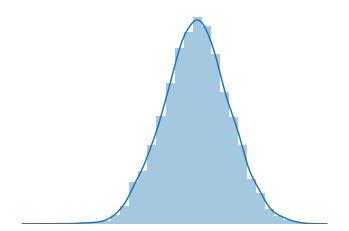

In [74]:
sns.distplot(np.random.randn(int(1e4)), bins=30)
plt.axis("off")

In [81]:
#不偏：ある推定量が平均的に母集団のパラメータと一致する
#不偏推定量：不偏性のある推定量

sample_mean_list = []
sample_var_list = []
count = 10000
for i in range(count):
    #標本抽出
    samples = np.random.choice(population, size=5)
    #標本平均をリストに格納
    sample_mean_list.append(np.mean(samples))
    #標本分散をリストに格納
    sample_var_list.append(np.var(samples))

#標本平均を集めた平均(期待値)は、母集団の平均に近づいていく
#つまり、標本平均は母集団平均の不偏推定量
print("population mean is {}".format(np.mean(population)))
print("sample_mean_list mean is {}".format(np.mean(sample_mean_list)))

#標本分散を集めた平均は、母集団の分散には近づかない
#つまり、標本分散は母集団の不偏推定量にはならない
#しかし、標本の不偏分散は母集団分散の不偏推定量になる
print("population variance is {}".format(np.var(population)))
print("sample_var_list mean is {}".format(np.mean(sample_var_list)))

population mean is 15.5
sample_mean_list mean is 15.51632
population variance is 51.392857142857146
sample_var_list mean is 40.859320000000004
